In [4]:
import itertools

import matplotlib.pyplot as plt
import polars as pl
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from src.utilities import find_project_root
from src.visualization import plot as putil

putil.set_mpl_styles(fontsize=10)

In [2]:
project_root = find_project_root()
feature_root = project_root / "reports/features"

cfg64_feature_path = feature_root / "SimpleCAE64/2023-07-21/20-18-22"
checkdata64 = pl.read_csv(cfg64_feature_path / "features_check_data.csv")
traindata64 = pl.read_csv(cfg64_feature_path / "features_train_data.csv")

cfg32_feature_path = feature_root / "SimpleCAE32/2023-07-10/13-09-32"
checkdata32 = pl.read_csv(cfg32_feature_path / "features_check_data.csv")
traindata32 = pl.read_csv(cfg32_feature_path / "features_train_data.csv")

cfg16_feature_path = feature_root / "SimpleCAE16/2025-02-04/08-12-21"
checkdata16 = pl.read_csv(cfg16_feature_path / "features_check_data.csv")
traindata16 = pl.read_csv(cfg16_feature_path / "features_train_data.csv")

In [3]:
#64
std64=StandardScaler()
pca64=PCA()

X = traindata64.select(pl.col(r"^column_\d+$")).to_numpy()
X_std = std64.fit_transform(X)
pca64.fit(X_std)

X64 = checkdata64.select(pl.col(r"^column_\d+$")).to_numpy()
X64_std = std64.transform(X64)
X64_pca = pca64.transform(X64_std)

# 32
std32=StandardScaler()
pca32=PCA()

X = traindata32.select(pl.col(r"^column_\d+$")).to_numpy()
X_std = std32.fit_transform(X)
pca32.fit(X_std)

X32 = checkdata32.select(pl.col(r"^column_\d+$")).to_numpy()
X32_std = std32.transform(X32)
X32_pca = pca32.transform(X32_std)

# 16
std16=StandardScaler()
pca16=PCA()

X = traindata16.select(pl.col(r"^column_\d+$")).to_numpy()
X_std = std16.fit_transform(X)
pca16.fit(X_std)

X16 = checkdata16.select(pl.col(r"^column_\d+$")).to_numpy()
X16_std = std16.transform(X16)
X16_pca = pca16.transform(X16_std)

In [11]:
cumlv_c64 = itertools.accumulate(pca64.explained_variance_ratio_)
cumlv_c32 = itertools.accumulate(pca32.explained_variance_ratio_)
cumlv_c16 = itertools.accumulate(pca16.explained_variance_ratio_)
print("No.: 64    , 32    , 16")
for i, (v64, v32, v16) in enumerate(zip(cumlv_c64, cumlv_c32, cumlv_c16)):
    print(f"{i:3d}: {v64:.4f}, {v32:.4f}, {v16:.4f}")


No.: 64    , 32    , 16
  0: 0.0274, 0.0409, 0.0582
  1: 0.0484, 0.0777, 0.1060
  2: 0.0689, 0.1125, 0.1456
  3: 0.0883, 0.1408, 0.1783
  4: 0.1072, 0.1677, 0.2050
  5: 0.1253, 0.1916, 0.2275
  6: 0.1428, 0.2117, 0.2484
  7: 0.1589, 0.2295, 0.2682
  8: 0.1746, 0.2460, 0.2870
  9: 0.1887, 0.2622, 0.3054
 10: 0.2024, 0.2779, 0.3234
 11: 0.2150, 0.2930, 0.3389
 12: 0.2267, 0.3078, 0.3539
 13: 0.2382, 0.3218, 0.3679
 14: 0.2493, 0.3357, 0.3816
 15: 0.2604, 0.3487, 0.3947
 16: 0.2713, 0.3611, 0.4074
 17: 0.2822, 0.3733, 0.4198
 18: 0.2927, 0.3849, 0.4318
 19: 0.3033, 0.3962, 0.4437
 20: 0.3137, 0.4072, 0.4554
 21: 0.3239, 0.4180, 0.4662
 22: 0.3338, 0.4286, 0.4767
 23: 0.3437, 0.4391, 0.4869
 24: 0.3534, 0.4496, 0.4967
 25: 0.3628, 0.4599, 0.5057
 26: 0.3722, 0.4698, 0.5145
 27: 0.3815, 0.4797, 0.5231
 28: 0.3907, 0.4892, 0.5316
 29: 0.3996, 0.4988, 0.5401
 30: 0.4086, 0.5079, 0.5485
 31: 0.4174, 0.5168, 0.5567
 32: 0.4263, 0.5256, 0.5647
 33: 0.4350, 0.5341, 0.5725
 34: 0.4437, 0.5423, 0.5

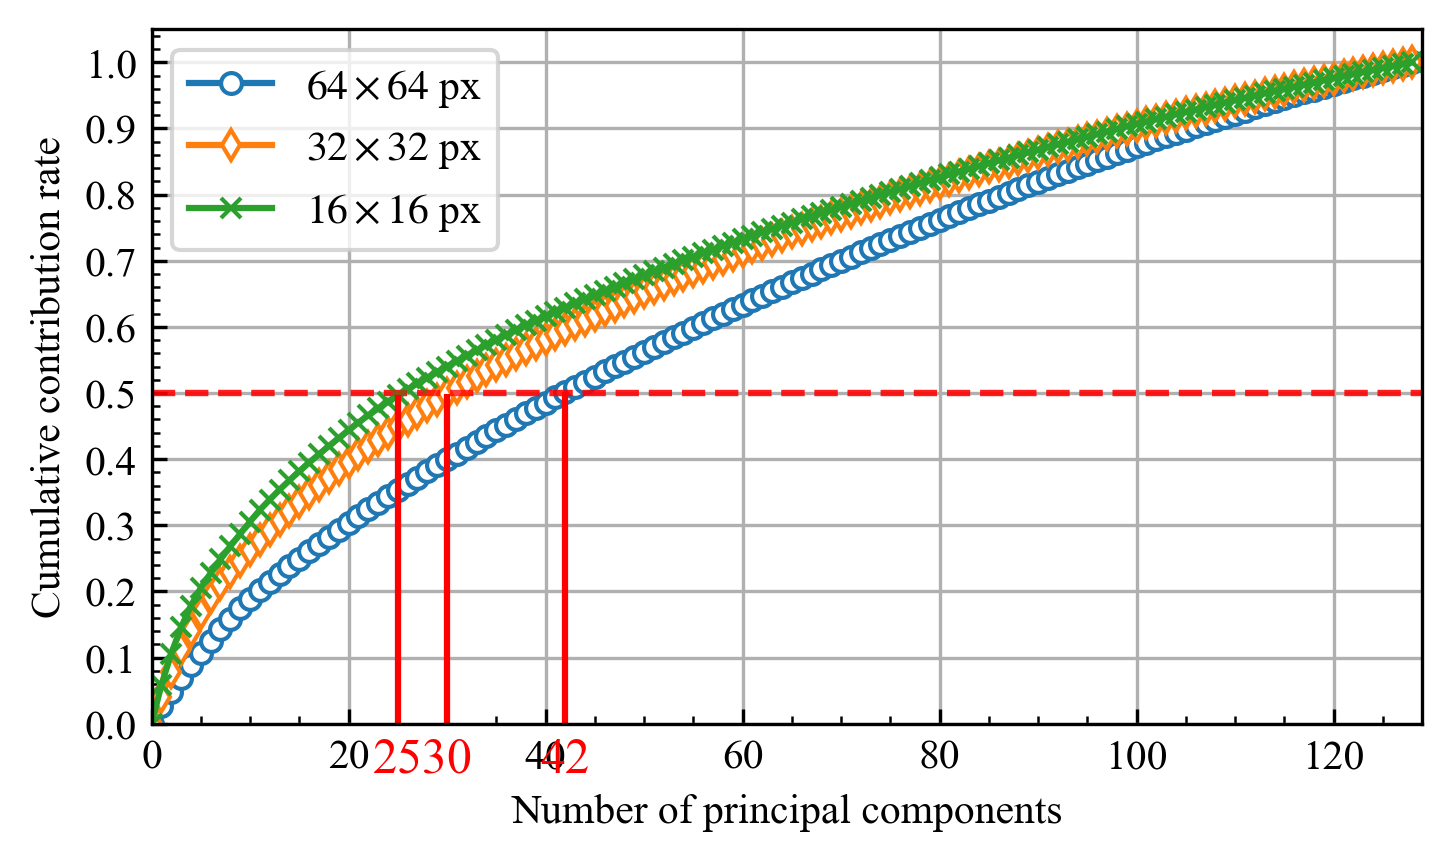

In [18]:
figsize = putil.cvt_unit((12, 7))
fig = plt.figure(figsize=figsize, layout='constrained', dpi=300)
th = 0.5

ax = fig.add_subplot()
*_, lines64, num_pc64 = putil.plot_cumulative_contribution_rate(
    pca64.explained_variance_ratio_,
    ax,
    threshold=th,
    show_threshold=True,
)
*_, lines32, num_pc32 = putil.plot_cumulative_contribution_rate(
    pca32.explained_variance_ratio_,
    ax,
    threshold=th,
    show_threshold=True,
)
*_, lines16, num_pc16 = putil.plot_cumulative_contribution_rate(
    pca16.explained_variance_ratio_,
    ax,
    threshold=th,
    show_threshold=True,
)


lines = ax.get_lines()
markers = ["o", "d", "x"]
imsizes = [64, 32, 16]
for line, marker, imsize in zip(lines, markers, imsizes):
    line.set_marker(marker)
    line.set_markerfacecolor("white")
    line.set_label(f"${imsize} \\times {imsize}$ px")
    line.set_markersize(5)
ax.legend()
# ax.set_xlabel("主成分の数")
# ax.set_ylabel("累積寄与率")

In [19]:
fig.savefig("ch3_contribution_rate.svg")